In [1]:
import numpy as np
import pandas as pd

In [294]:
df = pd.read_csv('./dataset/dataset10k.csv')

In [295]:
df.sample(5)

,Unnamed: 0,url,label
6705,6705,jooe.mobi,0
3806,3806,dibk.no,0
1381,1381,spiritualfront.com,0
5461,5461,muscularstrength.com,0
7476,7476,ivgoradm.ru,0


In [296]:
df.shape

(10000, 3)

In [278]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   url         10000 non-null  object
 2   label       10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [298]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0'],inplace=True)

In [299]:
df.sample(5)

,url,label
9002,carwallpapersfordesktop.org,0
6762,sh-ssjx.net,0
2549,zimmerei-roethinger.de,0
955,cialisfordailyuse.store,0
2765,viagra-100mggeneric.xyz,0


In [300]:
# renaming the cols
df.rename(columns={'label':'target','url':'url'},inplace=True)
df.insert(0,'target', df.pop('target'))
df.sample(5)


,target,url
8450,0,scarpetango.eu
1000,0,matteocremona.it
6662,0,armoredsaint.com
167,1,https://kiinteistotili.fi/plll/Match
9303,0,putlockers.ch


In [301]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [302]:
df['target'] = encoder.fit_transform(df['target'])

In [303]:
df.head()

,target,url
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...
2,1,http://ceramikaczary.pl/office/office/info.php
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/
4,1,http://www.shazaonline.com/admin/manager/PP-id...


In [304]:
# missing values
df.isnull().sum()

target    0
url       0
dtype: int64

In [287]:
# check for duplicate values
df.duplicated().sum()

254

In [288]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [289]:
df.duplicated().sum()

0

In [305]:
df.shape

(10000, 2)

## 2.EDA

In [306]:
df.head()

,target,url
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...
2,1,http://ceramikaczary.pl/office/office/info.php
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/
4,1,http://www.shazaonline.com/admin/manager/PP-id...


In [307]:
df['target'].value_counts()

target
0    9437
1     563
Name: count, dtype: int64

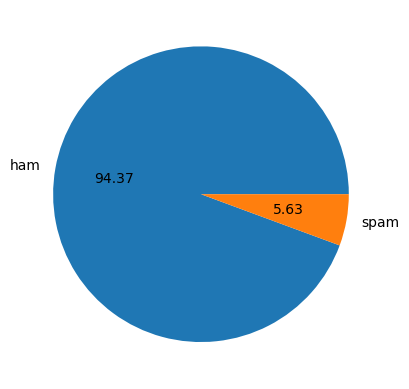

In [308]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [309]:
# Data is imbalanced

In [373]:
import nltk

In [374]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [387]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [546]:
def getWords(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    words = ""
    for i in text:
        words += i + " "

    words = words.split('.')
    return words

In [547]:
df['words'] = df['url'].apply(lambda x: getWords(x))
df.sample(5)

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www,words,transformed_text
4497,0,pbministries.org,16,0,0,0,0,1,0,0,"[pbministries, org ]",None
166,1,http://www.hmrc.uk.ne7nlaunchrand62t-confirmse...,276,0,0,51,1,8,1,1,"[http : //www, hmrc, uk, ne7nlaunchrand62t-con...",None
4672,0,meteobelgique.be,16,0,0,0,0,1,0,0,"[meteobelgique, be ]",None
3536,0,snuh.org,8,0,0,0,0,1,0,0,"[snuh, org ]",None
431,1,http://9a327404-a-62cb3a1a-s-sites.googlegroup...,69,0,0,12,0,5,0,0,"[http : //9a327404-a-62cb3a1a-s-sites, googleg...",None


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [553]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    # for i in text:
    #     if i.isalnum():
    #         y.append(i)

    # text = y[:]
    # y.clear()

    # for i in text:
    #     if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
    #         y.append(i)

    # text = y[:]
    # y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
   

In [554]:
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www,words,transformed_text
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0,23,0,4,1,0,"[http : //firebrandpc, com/dll, php ? parcel13...",None
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0,31,0,6,1,0,"[http : //sevtrane, gq/2b/sharepnt/file2, html...",None
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0,0,0,6,0,0,"[http : //ceramikaczary, pl/office/office/info...",None
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0,0,0,7,0,0,"[http : //ironcurtainwavebreak, com/cdsc/docu/...",None
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0,68,0,14,0,1,"[http : //www, shazaonline, com/admin/manager/...",None


In [555]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [556]:
df['transformed_text'] = df['words'].astype("str").apply(transform_text)

In [557]:
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www,words,transformed_text
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0,23,0,4,1,0,"[http : //firebrandpc, com/dll, php ? parcel13...",parcel13inboxlight amp amp amp fav
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0,31,0,6,1,0,"[http : //sevtrane, gq/2b/sharepnt/file2, html...",amp amp
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0,0,0,6,0,0,"[http : //ceramikaczary, pl/office/office/info...",
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0,0,0,7,0,0,"[http : //ironcurtainwavebreak, com/cdsc/docu/...",
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0,68,0,14,0,1,"[http : //www, shazaonline, com/admin/manager/...",


In [550]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [551]:
spam_wc = wc.generate(df[df['target'] == 1]['words'].str.cat(sep=" "))

TypeError: Cannot use .str.cat with values of inferred dtype 'mixed'.

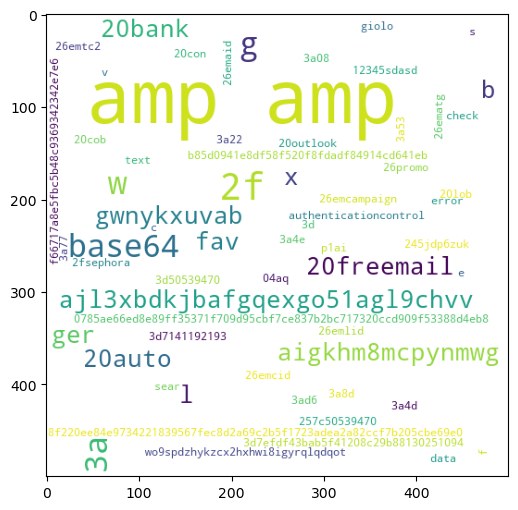

In [489]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [490]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

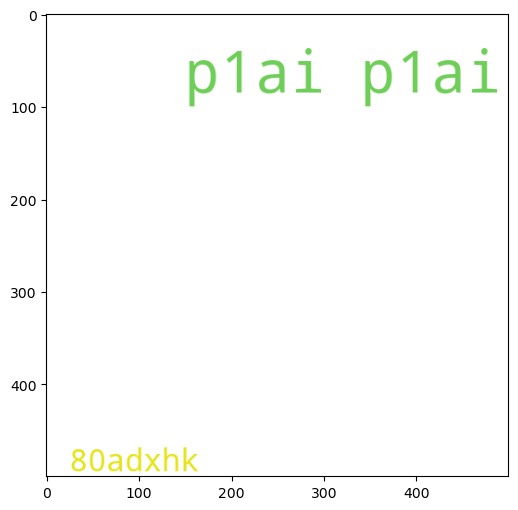

In [491]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,1,##############################################...,2863,690,35,adult club offer free membership instant acces...
4,1,I thought you might like these:\n1) Slim Down ...,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [ ]:
len(spam_corpus)

252427

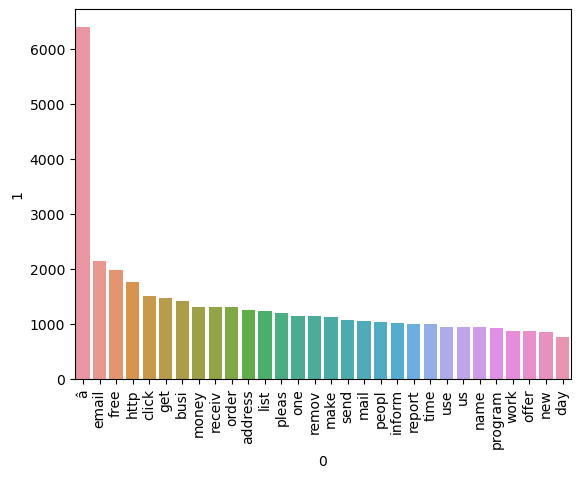

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30)), x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

544805

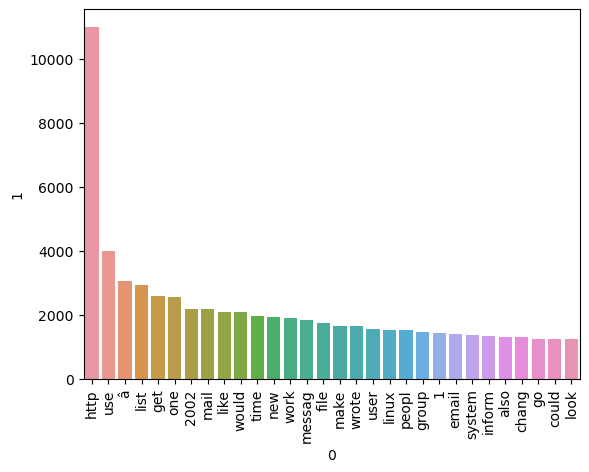

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30)), x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,1,##############################################...,2863,690,35,adult club offer free membership instant acces...
4,1,I thought you might like these:\n1) Slim Down ...,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [310]:
df['len_url'] = df['url'].apply(lambda x : len(x))
df.head()

,target,url,len_url
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117
2,1,http://ceramikaczary.pl/office/office/info.php,46
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232


In [311]:
df['contains_subscribe'] = df['url'].apply(lambda x : 1 if "subscribe" in x else 0)
df.head()

,target,url,len_url,contains_subscribe
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0
2,1,http://ceramikaczary.pl/office/office/info.php,46,0
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0


In [312]:
# check for #
df['contains_hash'] = df['url'].apply(lambda x : 1 if "#" in x else 0)
df.head()

,target,url,len_url,contains_subscribe,contains_hash
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0


In [313]:
df['num_digits'] = df['url'].apply(lambda x : len("".join(_ for _ in x if _.isdigit())) )
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0,23
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0,31
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0,0
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0,0
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0,68


In [314]:
df['non_https'] = df['url'].apply(lambda x : 1 if "https" in x else 0)
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0,23,0
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0,31,0
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0,0,0
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0,0,0
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0,68,0


In [315]:
df['num_words'] = df['url'].apply(lambda x : len(x.split("/")))
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0,23,0,4
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0,31,0,6
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0,0,0,6
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0,0,0,7
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0,68,0,14


In [316]:
df['contains_?'] = df['url'].apply(lambda x : 1 if "?" in x else 0)
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0,23,0,4,1
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0,31,0,6,1
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0,0,0,6,0
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0,0,0,7,0
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0,68,0,14,0


In [317]:
df['contains_www'] = df['url'].apply(lambda x : 1 if "www" in x else 0)
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0,23,0,4,1,0
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0,31,0,6,1,0
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0,0,0,6,0,0
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0,0,0,7,0,0
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0,68,0,14,0,1


In [318]:
df[['len_url','contains_subscribe','contains_hash', 'num_digits', 'non_https', 'num_words', 'contains_?', 'contains_www']].describe()

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
count,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,17.878100,0.0,0.000200,0.710400,0.006800,1.262800,0.009300,0.012300
std,21.414488,0.0,0.014141,5.508481,0.082185,1.186371,0.095992,0.110227
min,4.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,11.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,14.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,19.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,736.000000,0.0,1.000000,162.000000,1.000000,14.000000,1.000000,1.000000


In [319]:
# ham
df[df['target'] == 0][['len_url','contains_subscribe','contains_hash', 'num_digits', 'non_https', 'num_words', 'contains_?', 'contains_www']].describe()

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
count,9437.000000,9437.0,9437.0,9437.000000,9437.0,9437.0,9437.0,9437.000000
mean,14.832044,0.0,0.0,0.156512,0.0,1.0,0.0,0.000742
std,5.163158,0.0,0.0,0.690257,0.0,0.0,0.0,0.027227
min,4.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000
25%,11.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000
50%,14.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000
75%,18.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000
max,43.000000,0.0,0.0,11.000000,0.0,1.0,0.0,1.000000


In [320]:
#spam
df[df['target'] == 1][['len_url','contains_subscribe','contains_hash', 'num_digits', 'non_https', 'num_words', 'contains_?', 'contains_www']].describe()

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
count,563.000000,563.0,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,68.936057,0.0,0.003552,9.994671,0.120782,5.667851,0.165187,0.206039
std,70.313782,0.0,0.059549,20.984785,0.326163,2.107810,0.371679,0.404819
min,10.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,0.0,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,47.000000,0.0,0.000000,2.000000,0.000000,5.000000,0.000000,0.000000
75%,77.000000,0.0,0.000000,10.000000,0.000000,7.000000,0.000000,0.000000
max,736.000000,0.0,1.000000,162.000000,1.000000,14.000000,1.000000,1.000000


In [321]:
import seaborn as sns

<Axes: xlabel='len_url', ylabel='Count'>

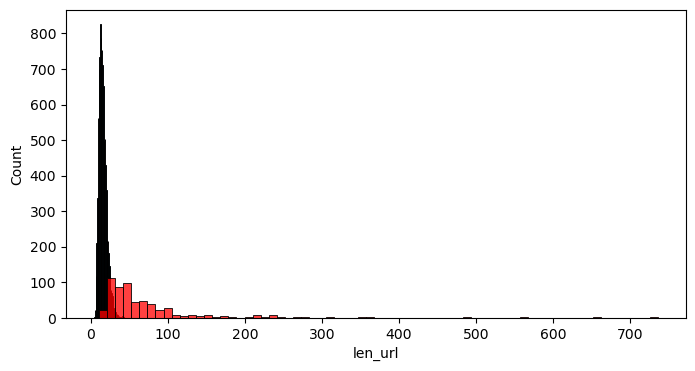

In [322]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['len_url'])
sns.histplot(df[df['target'] == 1]['len_url'],color='red')

<Axes: xlabel='num_digits', ylabel='Count'>

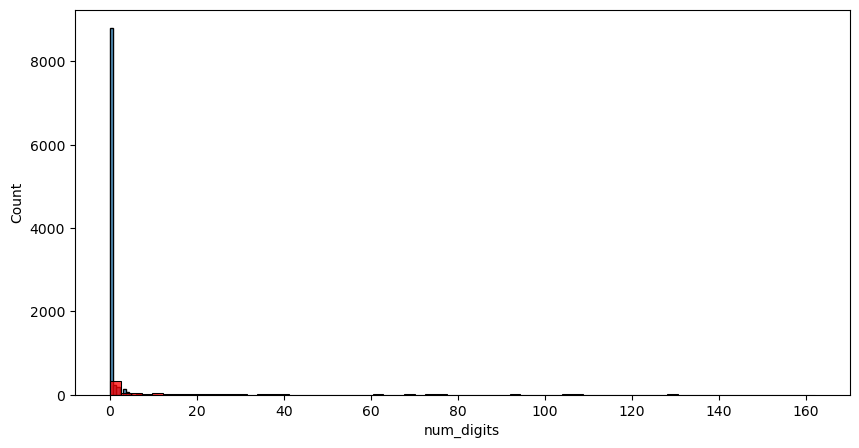

In [323]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_digits'])
sns.histplot(df[df['target'] == 1]['num_digits'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

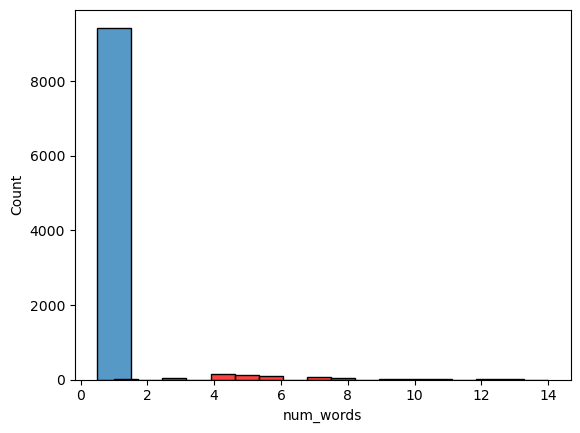

In [324]:
plt.figure()
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='contains_subscribe', ylabel='Count'>

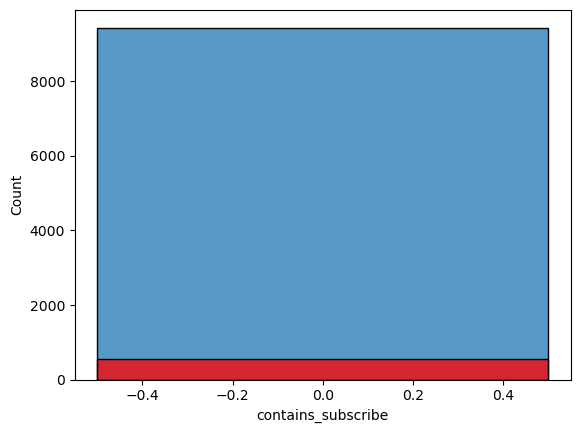

In [325]:
plt.figure()
sns.histplot(df[df['target'] == 0]['contains_subscribe'])
sns.histplot(df[df['target'] == 1]['contains_subscribe'],color='red')

<Axes: xlabel='contains_hash', ylabel='Count'>

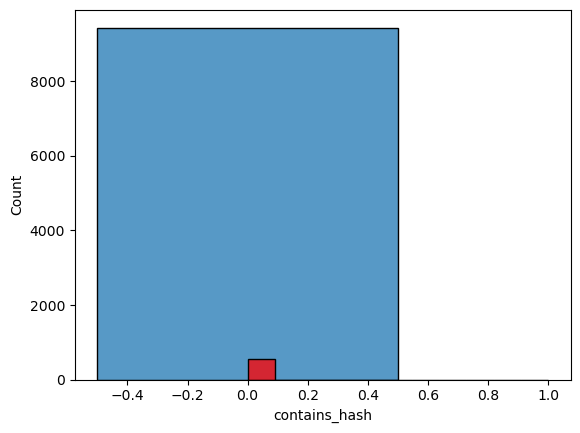

In [326]:
plt.figure()
sns.histplot(df[df['target'] == 0]['contains_hash'])
sns.histplot(df[df['target'] == 1]['contains_hash'],color='red')

<Axes: xlabel='non_https', ylabel='Count'>

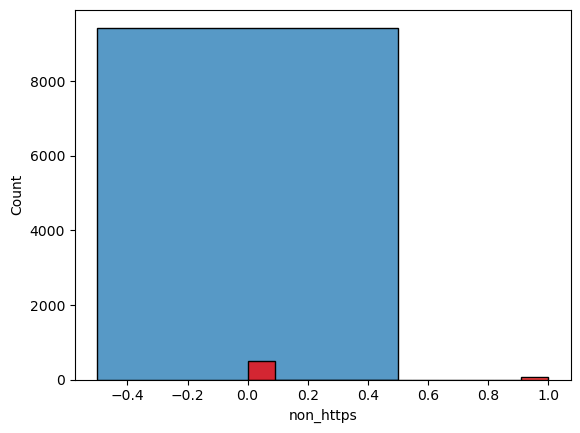

In [327]:
plt.figure()
sns.histplot(df[df['target'] == 0]['non_https'])
sns.histplot(df[df['target'] == 1]['non_https'],color='red')

<Axes: xlabel='contains_?', ylabel='Count'>

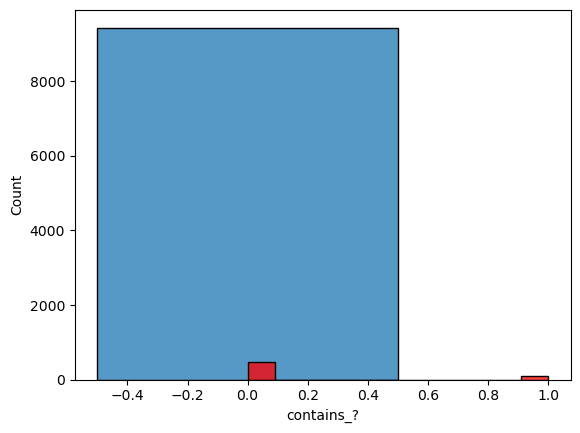

In [328]:
plt.figure()
sns.histplot(df[df['target'] == 0]['contains_?'])
sns.histplot(df[df['target'] == 1]['contains_?'],color='red')

<Axes: xlabel='contains_www', ylabel='Count'>

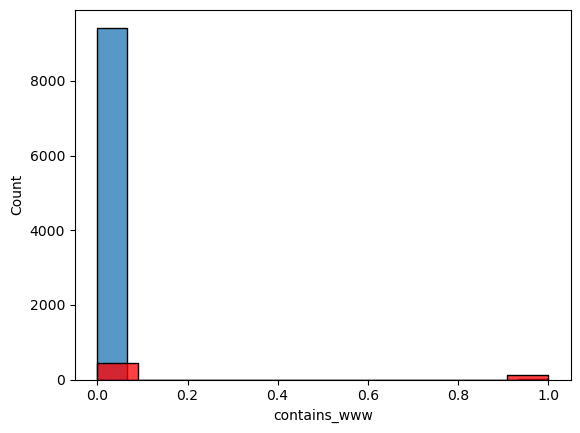

In [329]:
plt.figure()
sns.histplot(df[df['target'] == 0]['contains_www'])
sns.histplot(df[df['target'] == 1]['contains_www'],color='red')

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
0,1,http://firebrandpc.com/dll.php?parcel13InboxLi...,103,0,0,23,0,4,1,0
1,1,http://sevtrane.gq/2b/sharepnt/file2.html?webs...,117,0,0,31,0,6,1,0
2,1,http://ceramikaczary.pl/office/office/info.php,46,0,0,0,0,6,0,0
3,1,http://ironcurtainwavebreak.com/cdsc/docu/fonts/,48,0,0,0,0,7,0,0
4,1,http://www.shazaonline.com/admin/manager/PP-id...,232,0,0,68,0,14,0,1


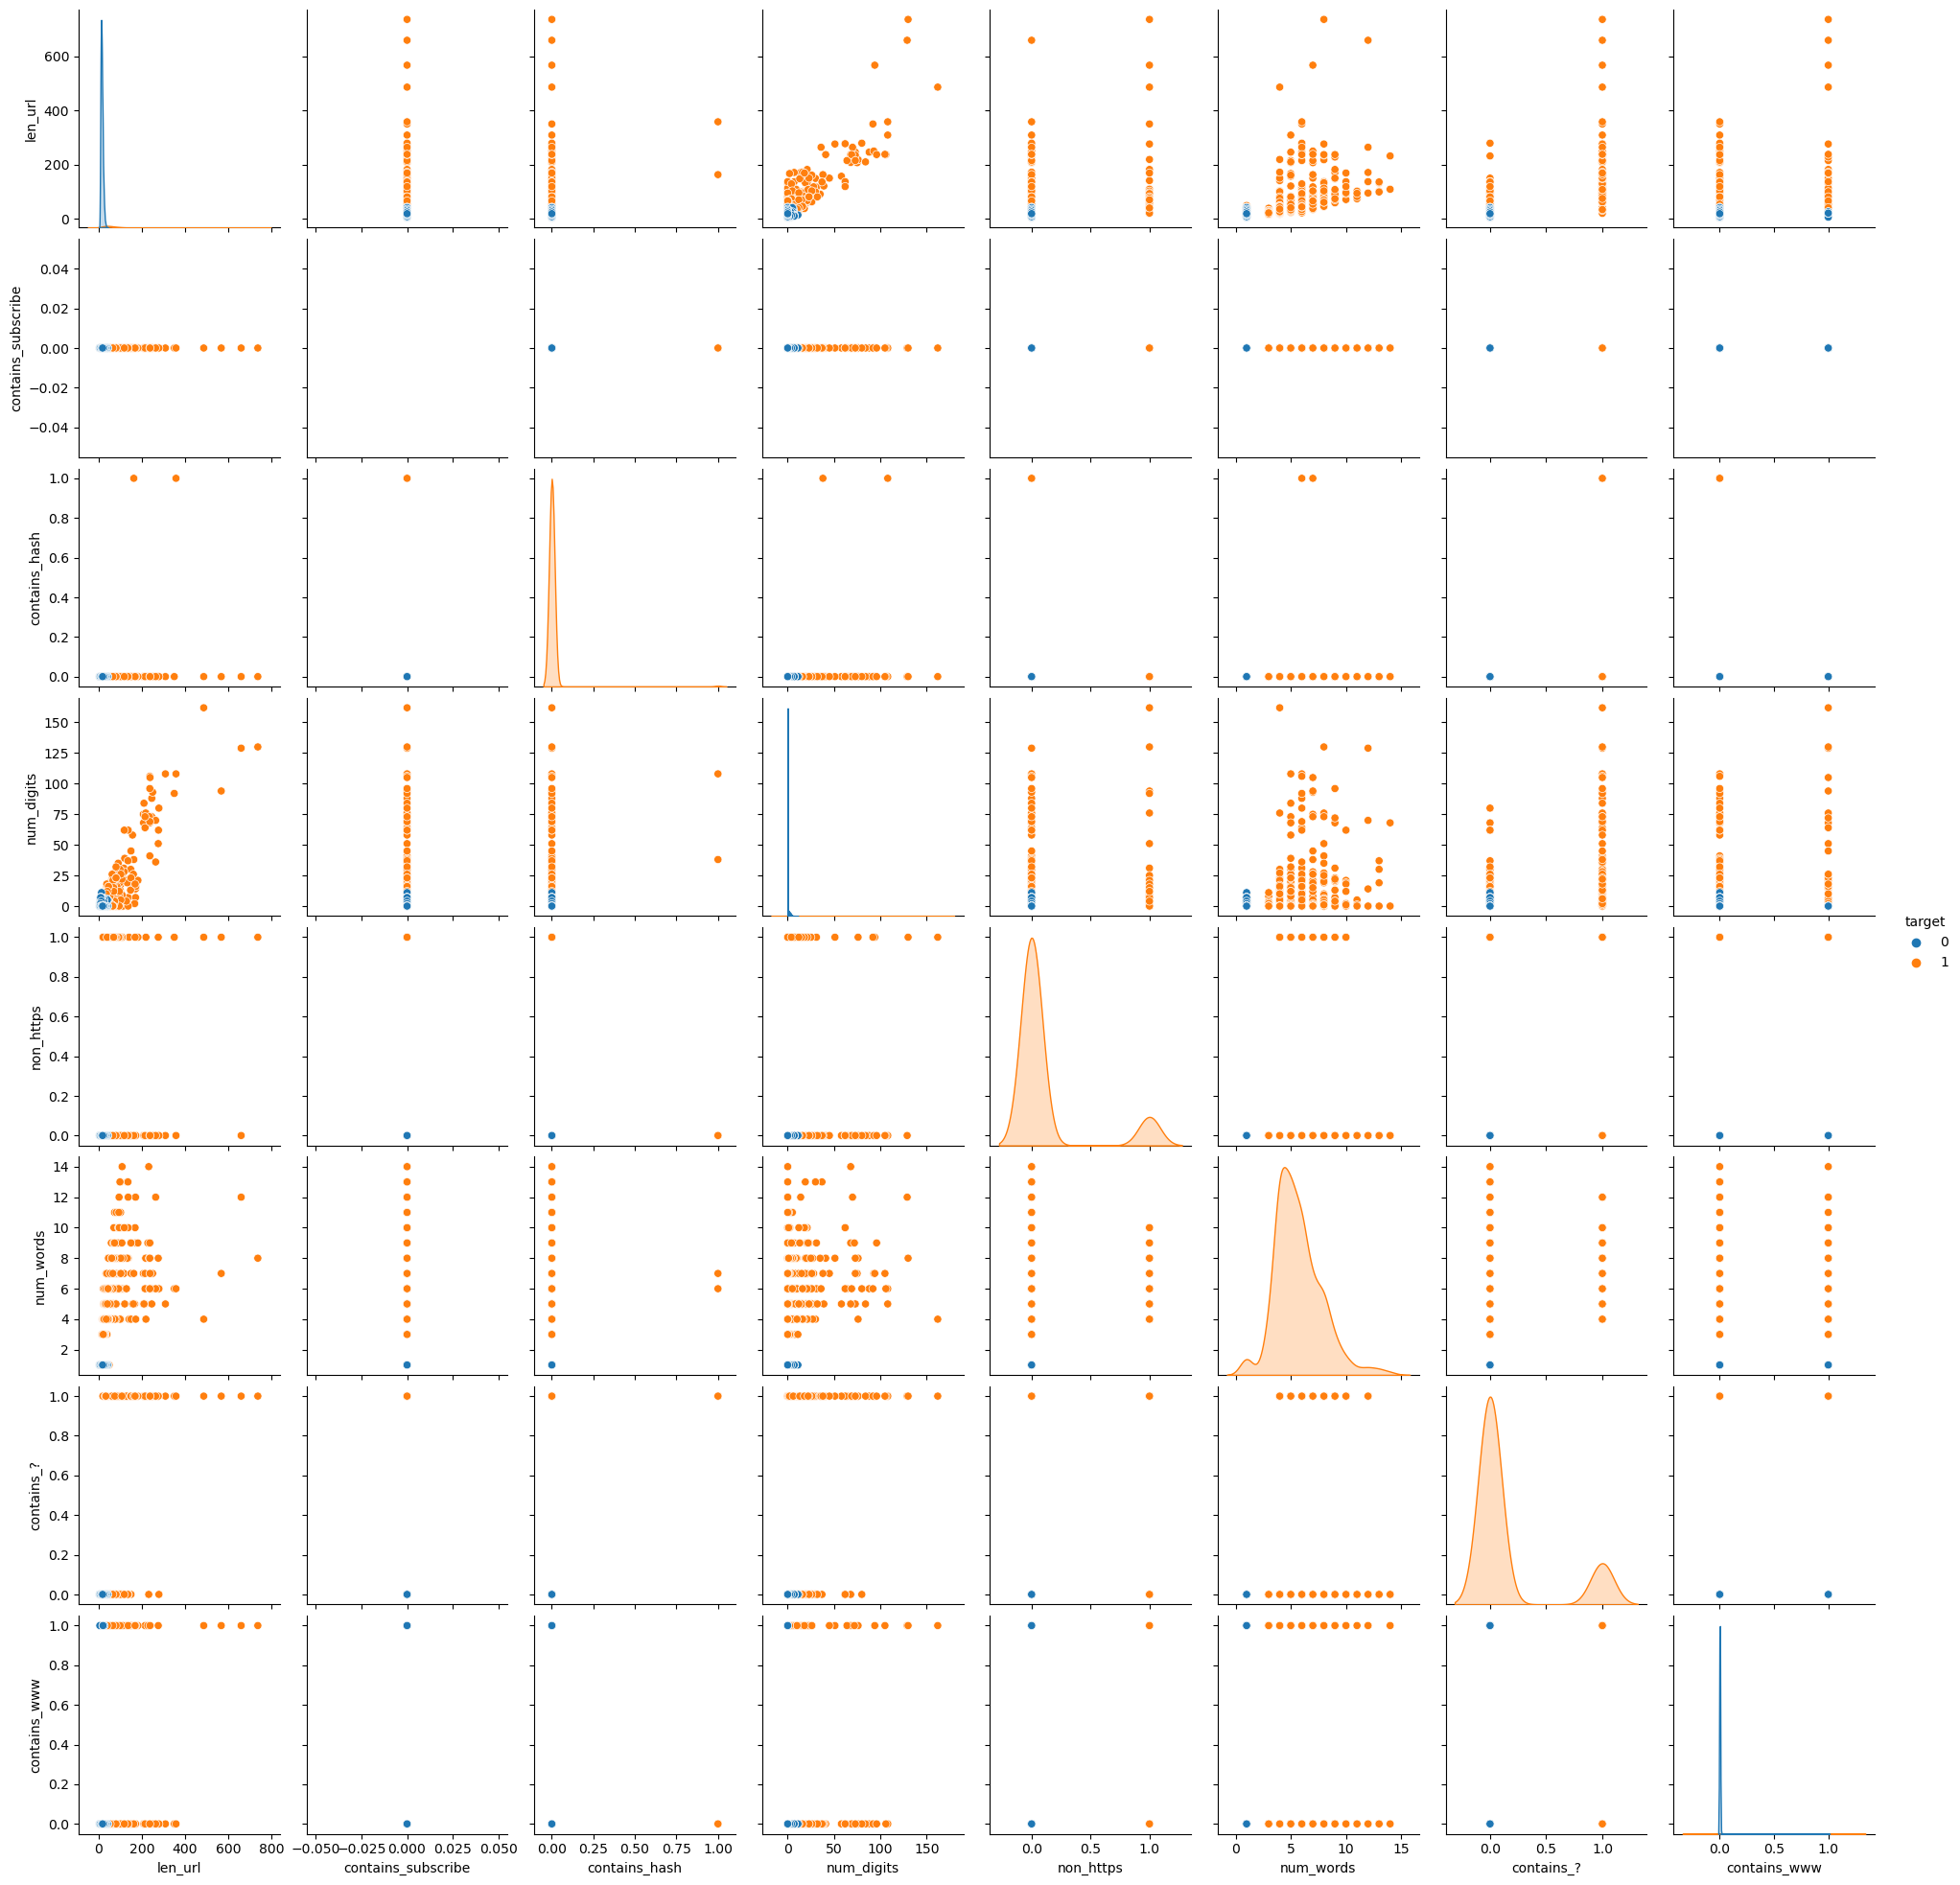

In [330]:
sns.pairplot(df,hue='target')
df.head()


<Axes: >

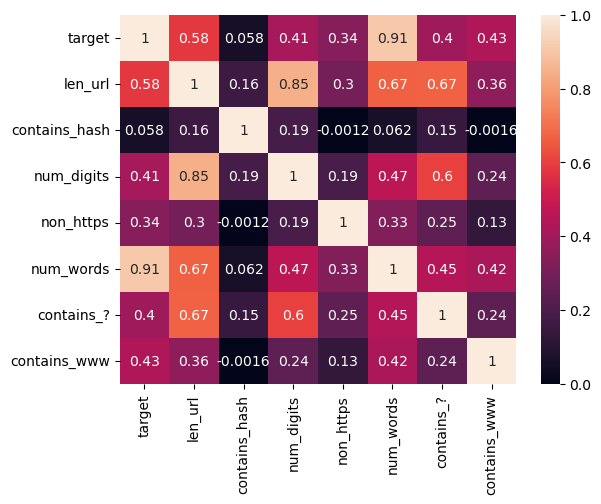

In [332]:
dfCorr = df[['target','len_url','contains_hash', 'num_digits', 'non_https', 'num_words', 'contains_?', 'contains_www']].corr()
sns.heatmap(dfCorr,annot=True)

## 4. Model Building

In [333]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [334]:
X = tfidf.fit_transform(df['url']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [335]:
X.shape

(10000, 3000)

In [336]:
y = df['target'].values

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [339]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [340]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC()

In [341]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.1685
[[ 253 1651]
 [  12   84]]
0.0484149855907781


In [371]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.99
[[1904    0]
 [  20   76]]
1.0


In [343]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9925
[[1904    0]
 [  15   81]]
1.0


In [344]:
svc.fit(X_train,y_train)
y_pred4 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9985
[[1904    0]
 [   3   93]]
1.0


In [ ]:
# tfidf --> scv

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [346]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [347]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [348]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [349]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.999, 1.0)

In [350]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.999
Precision -  1.0
For  KN
Accuracy -  0.963
Precision -  0.8928571428571429
For  NB
Accuracy -  0.99
Precision -  1.0
For  DT
Accuracy -  0.999
Precision -  1.0
For  LR
Accuracy -  0.999
Precision -  1.0
For  RF
Accuracy -  0.999
Precision -  1.0
For  AdaBoost
Accuracy -  0.999
Precision -  1.0
For  BgC
Accuracy -  0.999
Precision -  1.0
For  ETC
Accuracy -  0.999
Precision -  0.9895833333333334
For  GBDT
Accuracy -  0.999
Precision -  1.0
For  xgb
Accuracy -  0.998
Precision -  1.0


In [351]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [352]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.999,1.000000
2,NB,0.990,1.000000
3,DT,0.999,1.000000
4,LR,0.999,1.000000
5,RF,0.999,1.000000
6,AdaBoost,0.999,1.000000
7,BgC,0.999,1.000000
9,GBDT,0.999,1.000000
10,xgb,0.998,1.000000
8,ETC,0.999,0.989583


In [353]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [354]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.999000
1,NB,Accuracy,0.990000
2,DT,Accuracy,0.999000
3,LR,Accuracy,0.999000
4,RF,Accuracy,0.999000
5,AdaBoost,Accuracy,0.999000
6,BgC,Accuracy,0.999000
7,GBDT,Accuracy,0.999000
8,xgb,Accuracy,0.998000
9,ETC,Accuracy,0.999000


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


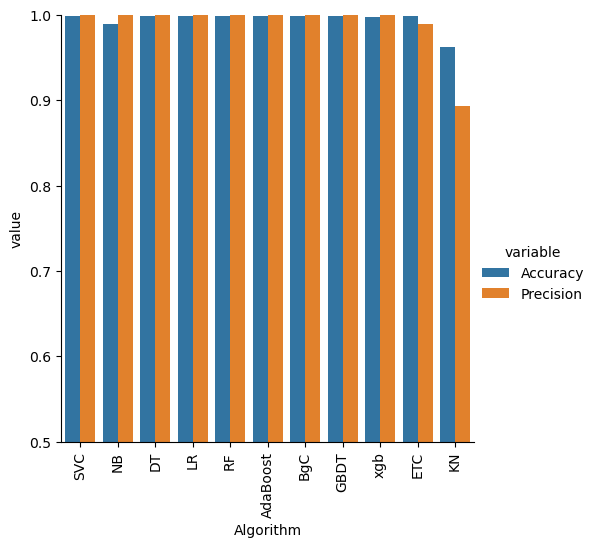

In [355]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [356]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [357]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [358]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [359]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [360]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [361]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [362]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.999,1.000000,0.999,1.000000,0.999,1.000000,0.999,1.000000
1,NB,0.990,1.000000,0.990,1.000000,0.990,1.000000,0.990,1.000000
2,DT,0.999,1.000000,0.999,1.000000,0.999,1.000000,0.999,1.000000
3,LR,0.999,1.000000,0.999,1.000000,0.999,1.000000,0.999,1.000000
4,RF,0.999,1.000000,0.999,1.000000,0.999,1.000000,0.999,1.000000
5,AdaBoost,0.999,1.000000,0.999,1.000000,0.999,1.000000,0.999,1.000000
6,BgC,0.999,1.000000,0.999,1.000000,0.999,1.000000,0.999,1.000000
7,GBDT,0.999,1.000000,0.999,1.000000,0.999,1.000000,0.999,1.000000
8,xgb,0.998,1.000000,0.998,1.000000,0.998,1.000000,0.998,1.000000
9,ETC,0.999,0.989583,0.999,0.989583,0.999,0.989583,0.999,0.989583


In [363]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [364]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [365]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [366]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.999
Precision 1.0


In [367]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [368]:
from sklearn.ensemble import StackingClassifier



In [369]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [370]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.999
Precision 1.0


In [372]:
import pickle
pickle.dump(tfidf,open('vectorizer-url.pkl','wb'))
pickle.dump(bnb,open('model-url.pkl','wb'))